# SWEET Vetting Example

SWEET is the Sine Wave Event Evaluation Test and determines if the TCE under evaluation is actually due to a star's inherent pulsations or due to ellipsoidal variability.  SWEET looks for strong sinusoidal signal at the period of the TCE and at half and twice that period.


In [1]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [2]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 432x288 with 0 Axes>

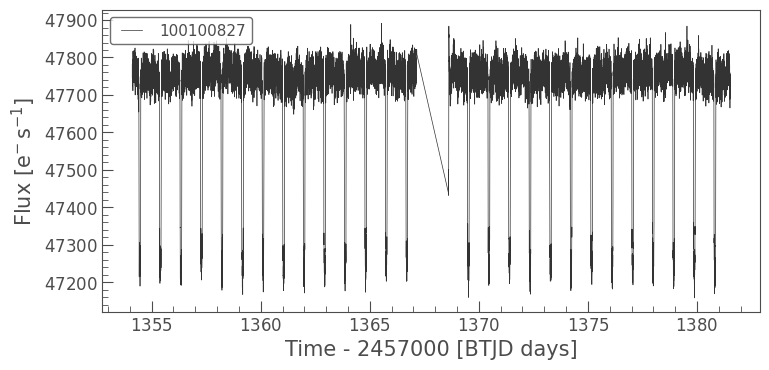

In [3]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('WASP18b_lightcurve.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.TransitPhaseCoverage`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
sweet_instance = vet.Sweet()
sweet_results = sweet_instance.run(tce, lc)

sweet_results

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


{'msg': 'WARN: SWEET test finds signal at HALF transit period\nWARN: SWEET test finds signal at the transit period\nWARN: SWEET test finds signal at TWICE the transit period',
 'amp': array([[ 9.91910842,  0.29953146, 33.11541491],
        [ 2.75995642,  0.30776912,  8.96761966],
        [ 1.31039811,  0.3083288 ,  4.2500023 ]])}

In Transit Phase Coverage, the results are as follows: "**Better description of these values and their use"**
* msg : contains warnings, if applicable.
* amp : contains the best fit amplitude, its uncertainty, and amplitude-to-uncertainty ratio for half-period, period, and twice the period.            

The following attributes are also available after running the vetter object:
* metrics : SWEET result dictionary.

In order to generate diagnostic plots from vetters, we can either use the `plot` method with the vetter object after it has been run, or use `plot=True` as a parameter to the `run` method to do both run and plot at the same time

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


<Figure size 432x288 with 0 Axes>

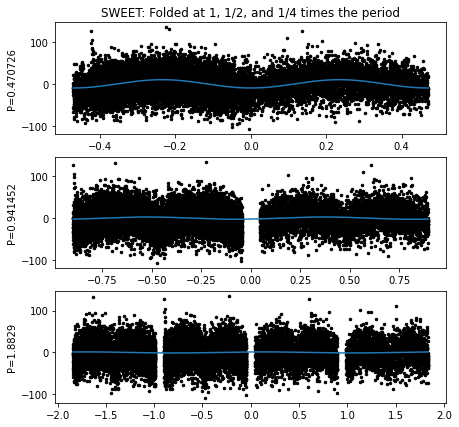

In [5]:
plt.figure()
sweet_instance.plot()
plt.show()

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


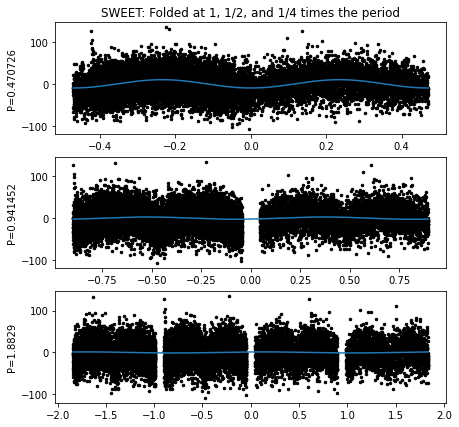

In [6]:
sweet_results = sweet_instance.run(tce, lc, plot=True)